# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [59]:
dados = pd.read_csv('dados/alguem_residencial.csv', sep = ';')

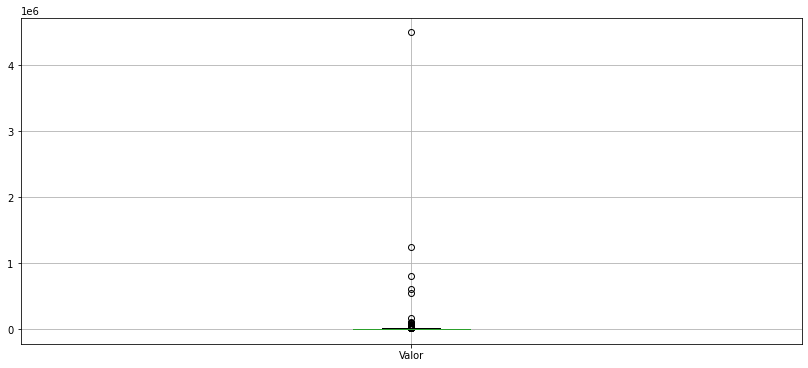

In [60]:
dados.boxplot(['Valor'])

In [61]:
dados[dados.Valor >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [62]:
valor = dados.Valor

<img src='compressed_box-plot.png' width=70%>

In [63]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [64]:
selecao = (valor >= limite_inferior) & (valor<=limite_superior)

In [65]:
dados_new = dados[selecao]

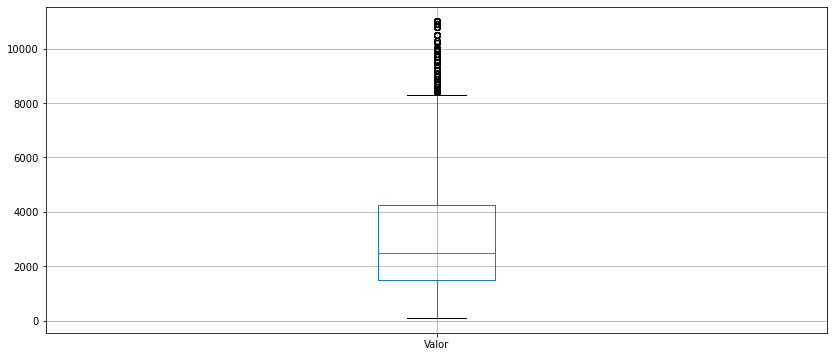

In [66]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002762995DB80>]],
      dtype=object)

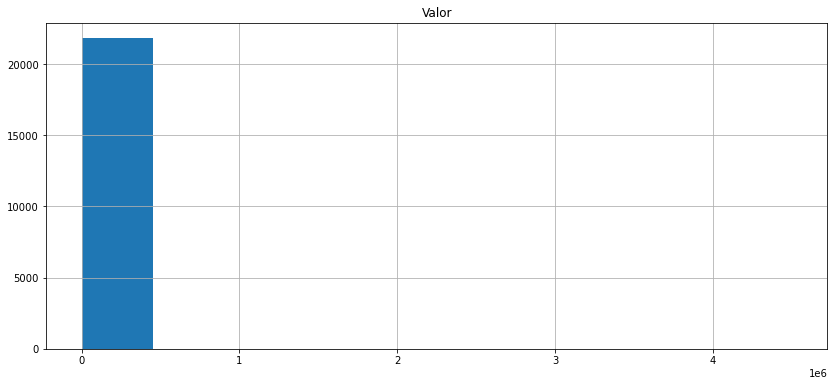

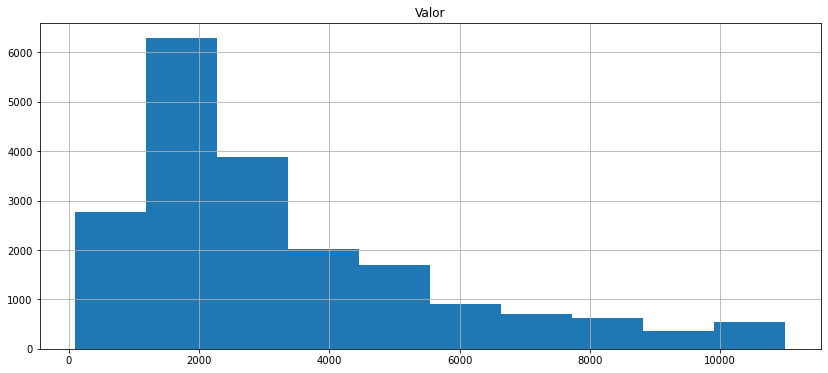

In [67]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Continuaçao

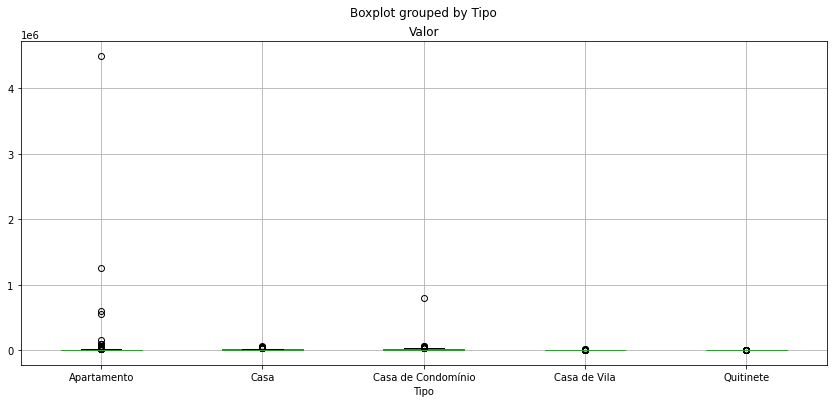

In [68]:
dados.boxplot(['Valor'], by='Tipo')

In [69]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [70]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [71]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [72]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [73]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [74]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [75]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [76]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [80]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados.Valor >= limite_inferior[tipo]) & (dados.Valor <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

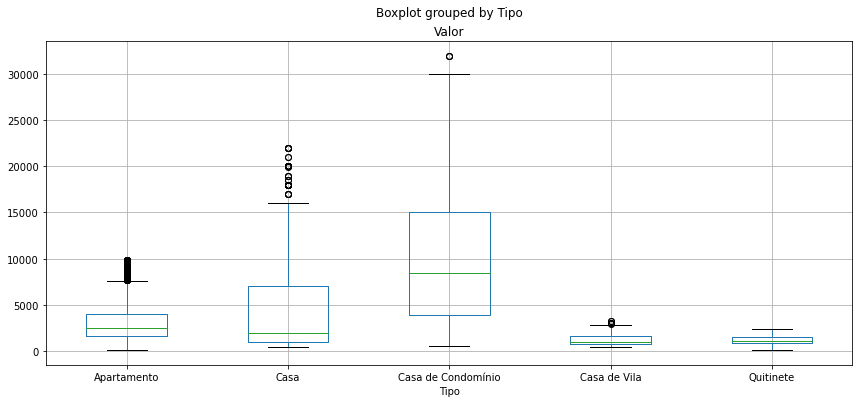

In [81]:
dados_new.boxplot(['Valor'], by='Tipo')

In [82]:
dados_new.to_csv('dados/alguel_residencial_sem_outliers.csv', sep=';', index=False)